# Importing necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt 
import seaborn as sns
warnings.filterwarnings(action='ignore')

# Reading dataset

In [2]:
df = pd.read_csv('tour_package.csv')

# EDA

In [3]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
df.shape

(4888, 20)

In [5]:
len(df.columns)

20

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [7]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


# Data Preprocessing

In [8]:
df.replace(to_replace = {'Fe Male': 'Female'},inplace=True)
df.replace(to_replace = {'Unmarried': 'Single'},inplace=True)

* Now, we will solve the following questions to perform EDA

1. how many salaried people chose delux package 
2. avg age of of people as per prod taken 
3. avg monthly income of people on the basis of product pitched
4. which gender took more product?
5. no of people on the basis of their occupation

In [9]:
#1. How many salaried people chose delux package?
a = df[(df['Occupation'] == 'Salaried') & (df['ProductPitched'] == 'Deluxe')]
a.groupby('Occupation')['ProductPitched'].count()

Occupation
Salaried    818
Name: ProductPitched, dtype: int64

In [10]:
#2 avg age of of people as per prod taken 
df.groupby('ProdTaken')['Age'].median()

ProdTaken
0    37.0
1    33.0
Name: Age, dtype: float64

In [11]:
#3 avg monthly income of people on the basis of product pitchd
df.groupby('ProductPitched')['MonthlyIncome'].mean()

ProductPitched
Basic           19939.922507
Deluxe          22643.157629
King            35878.947826
Standard        26637.749326
Super Deluxe    32241.046784
Name: MonthlyIncome, dtype: float64

In [12]:
#4 which gender took more product?
a = df[df['ProdTaken'] == 1]
a.groupby('Gender')['ProdTaken'].count().sort_values(ascending=False)

Gender
Male      578
Female    342
Name: ProdTaken, dtype: int64

In [13]:
#5. no of people on the basis of their occupation
df['Occupation'].value_counts()

Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

# Data Visualization

In [14]:
cat_col = ['ProdTaken','TypeofContact','CityTier','Occupation','Gender','ProductPitched','MaritalStatus','Passport','Designation','OwnCar','NumberOfPersonVisiting','NumberOfFollowups','PreferredPropertyStar','PitchSatisfactionScore','NumberOfChildrenVisiting']
cont_col = ['Age','DurationOfPitch','MonthlyIncome','NumberOfTrips']

# Counplot of all categorical columns

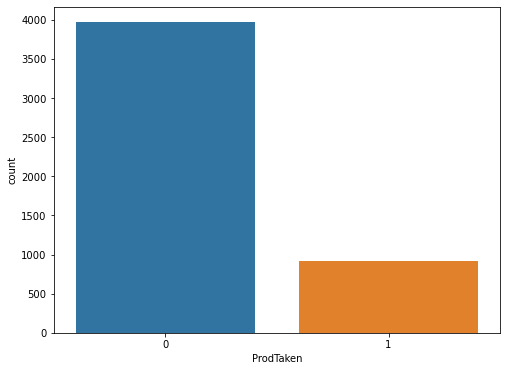

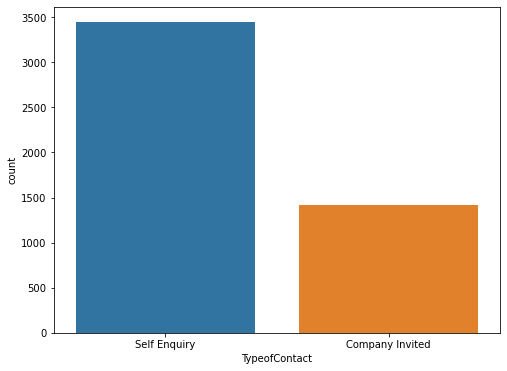

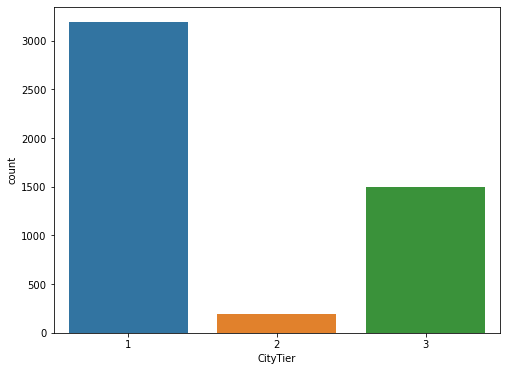

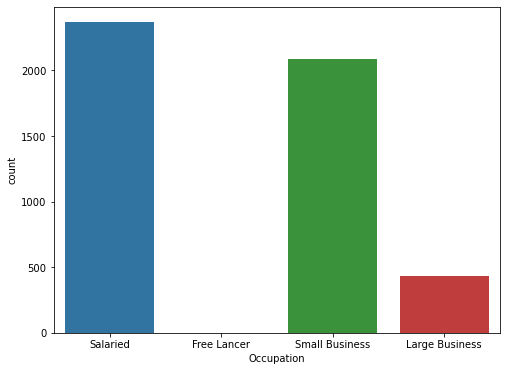

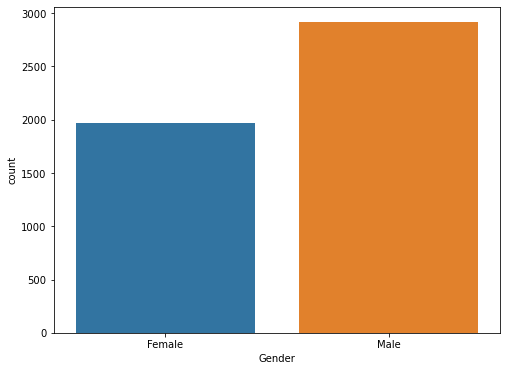

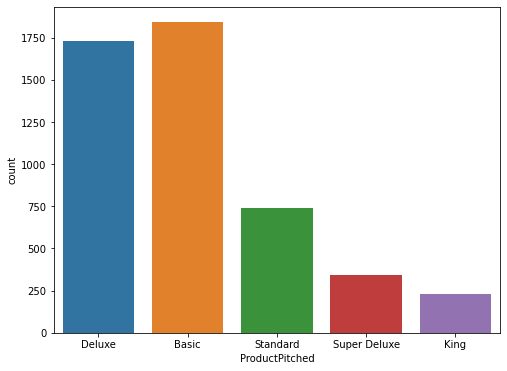

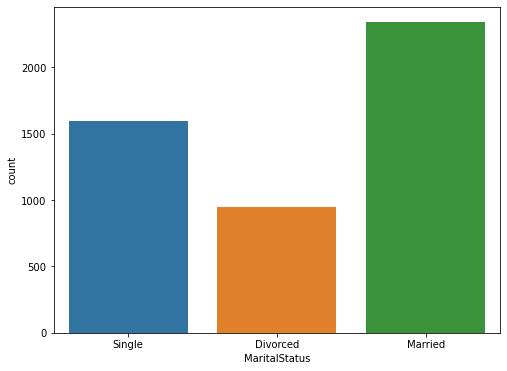

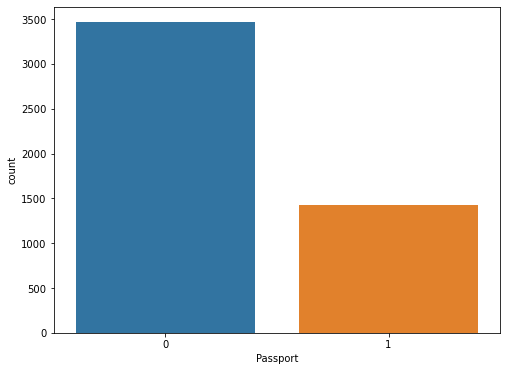

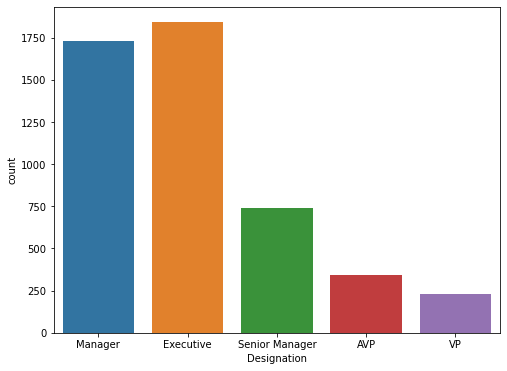

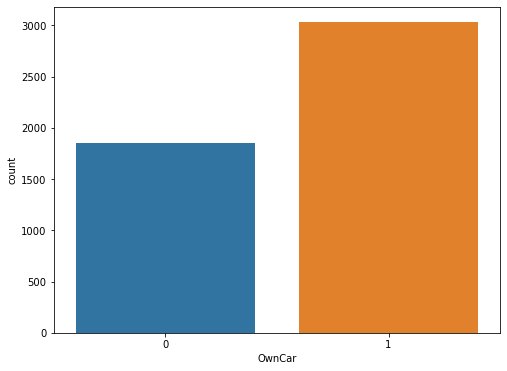

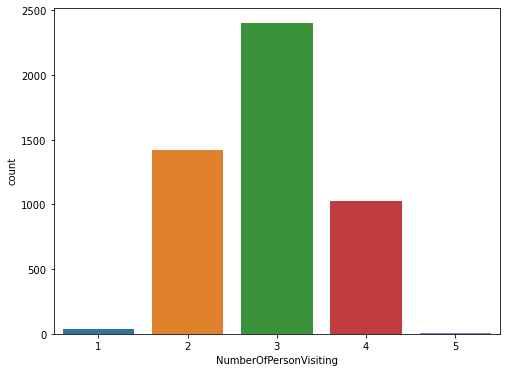

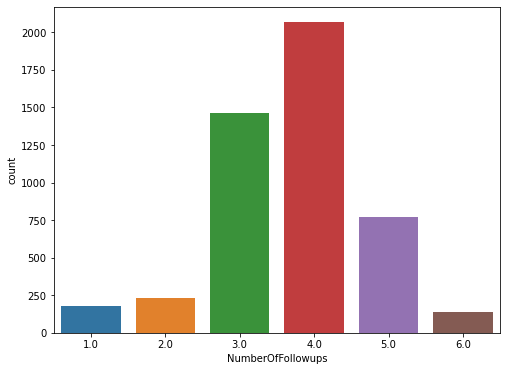

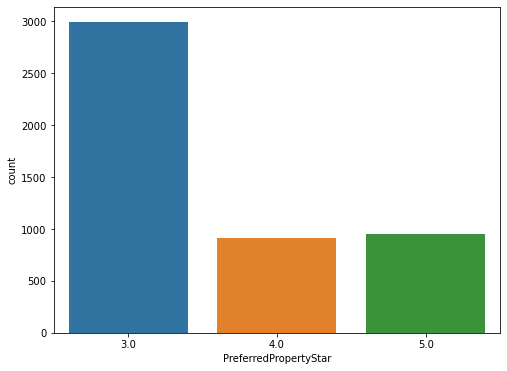

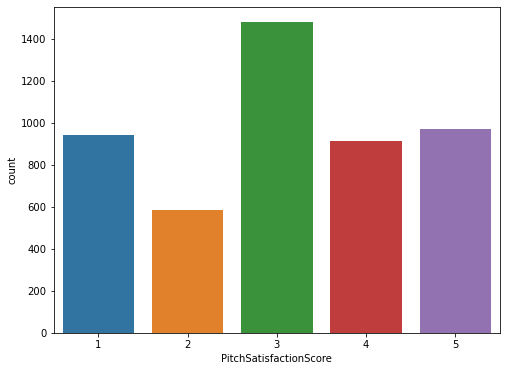

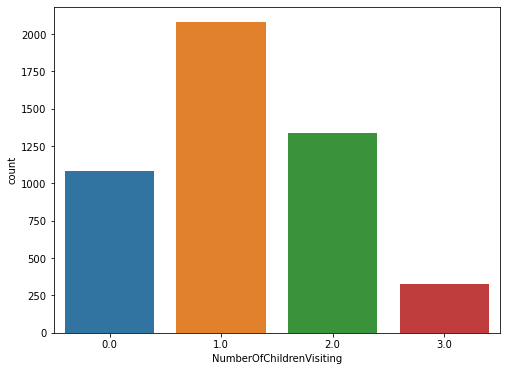

In [15]:
warnings.filterwarnings(action='ignore')
for i in cat_col:
    plt.figure(figsize=(8,6))
    sns.countplot(df[i])

# Distibution plot for all cont columns

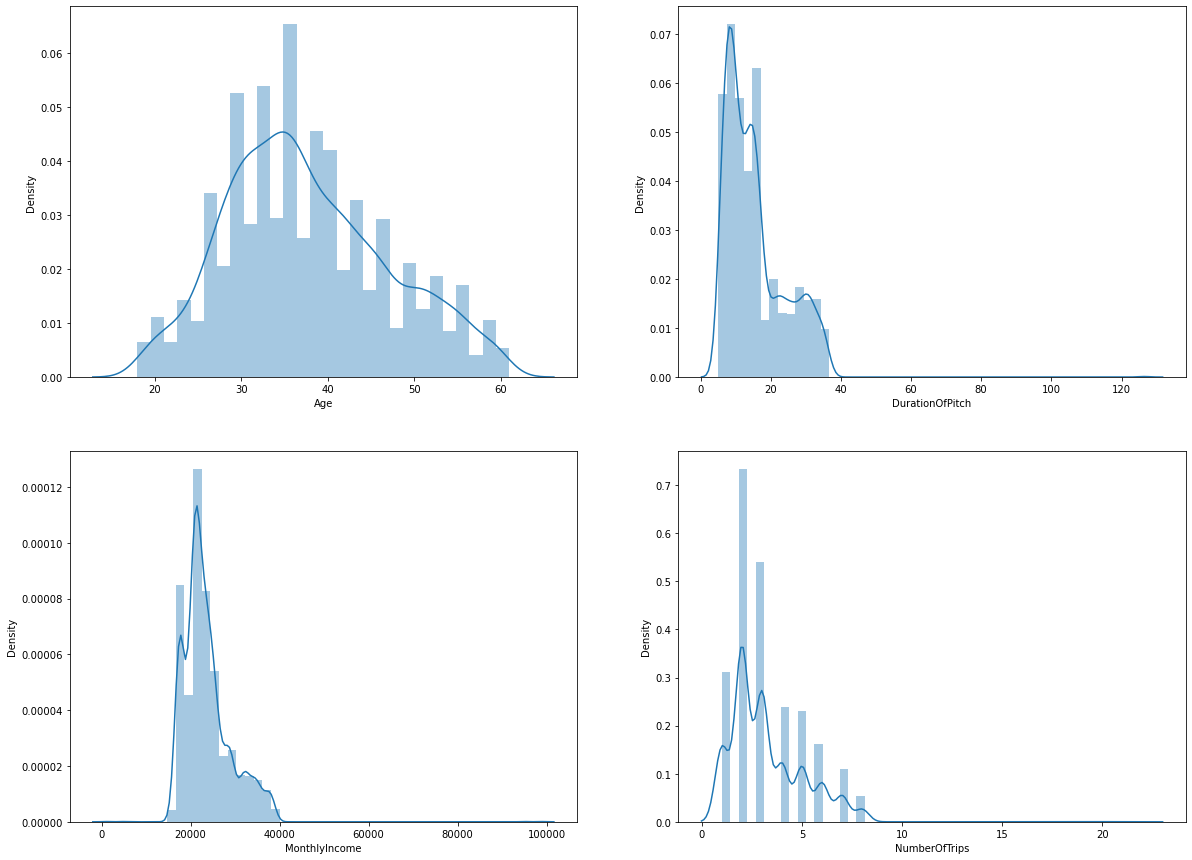

In [16]:
plt.figure(figsize=(20,15))
for i,col in enumerate(cont_col):
    plt.subplot(2,2,i+1)
    sns.distplot(df[col])

# Countplot of all cat columns on the basis of prod taken. 

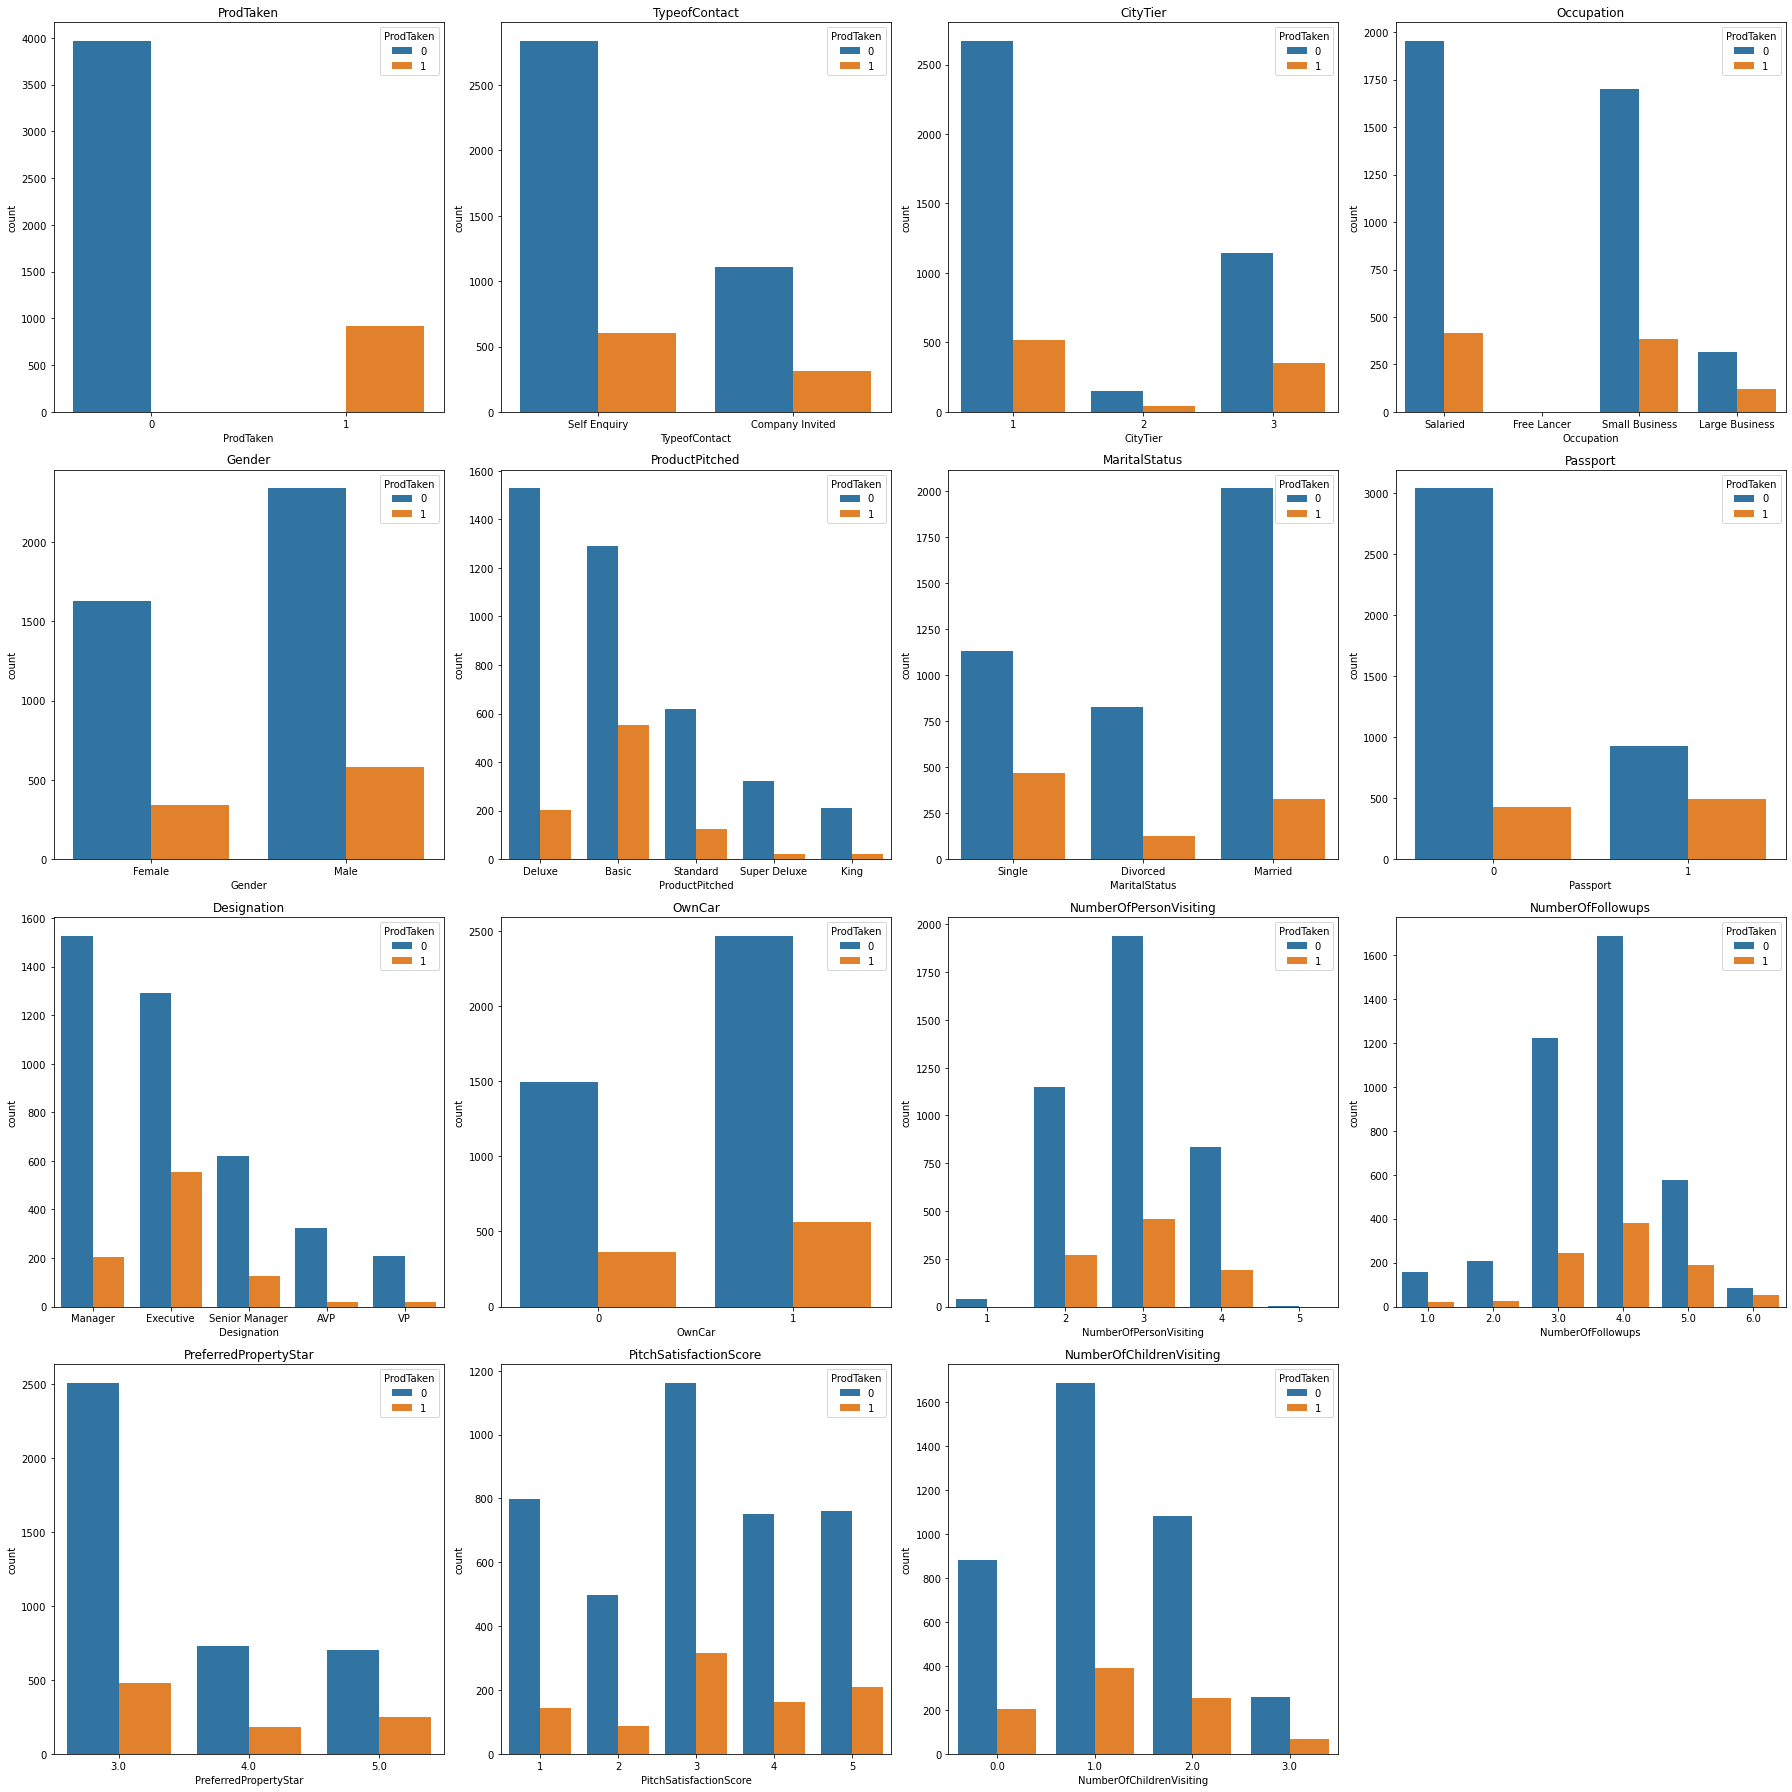

In [17]:
plt.figure(figsize=(25,25))
for i,col in enumerate(cat_col):
    plt.subplot(4,4,i+1)
    plt.title(col)
    plt.tight_layout()
    # plt.xticks(rotation=45)
    sns.countplot(x=col,data=df,hue='ProdTaken')

# Countplot of categorical columns using sub-plot. 

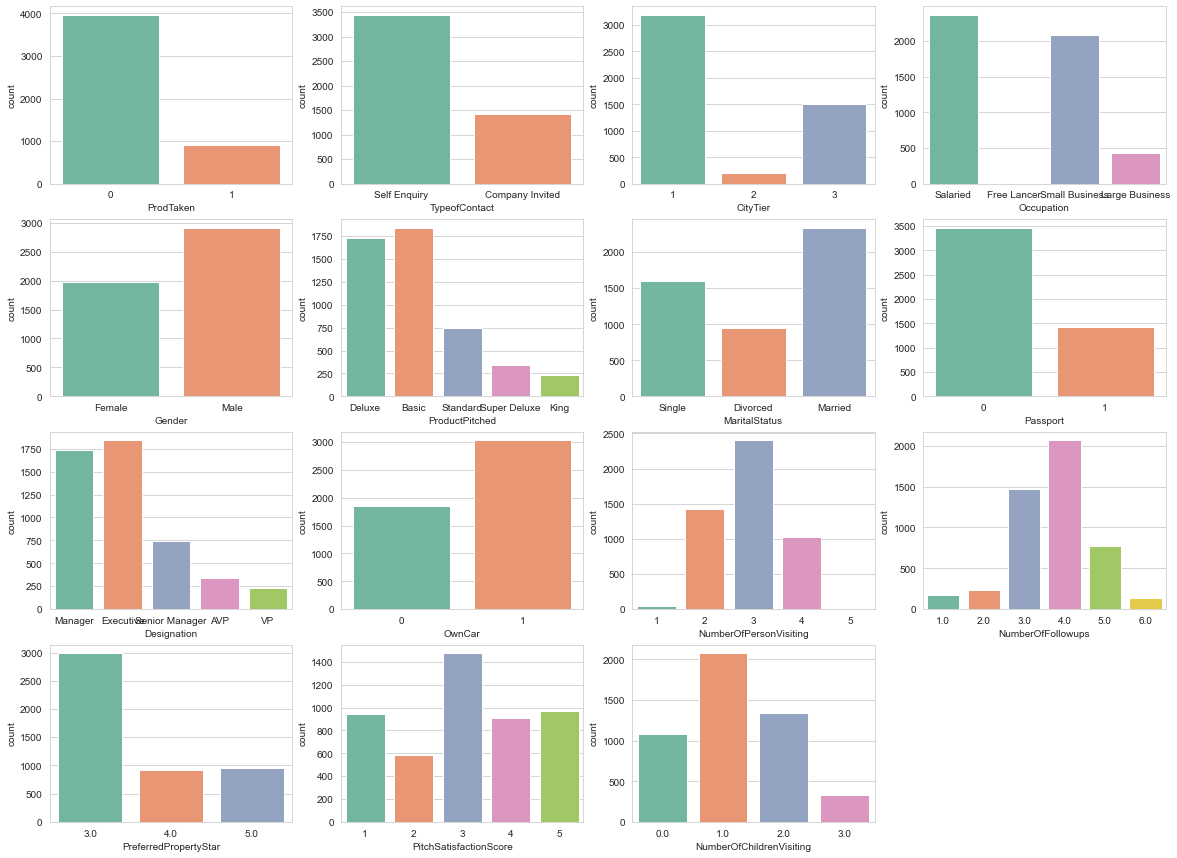

In [18]:
sns.set_style('whitegrid')
sns.set_palette('Set2')

plt.figure(figsize=(20,15))
for i,col in enumerate(cat_col):
    plt.subplot(4,4,i+1)
    sns.countplot(x=col,data=df)

# Checking for null values:

In [19]:
df.isnull().sum()/len(df)*100

CustomerID                  0.000000
ProdTaken                   0.000000
Age                         4.623568
TypeofContact               0.511457
CityTier                    0.000000
DurationOfPitch             5.135025
Occupation                  0.000000
Gender                      0.000000
NumberOfPersonVisiting      0.000000
NumberOfFollowups           0.920622
ProductPitched              0.000000
PreferredPropertyStar       0.531915
MaritalStatus               0.000000
NumberOfTrips               2.864157
Passport                    0.000000
PitchSatisfactionScore      0.000000
OwnCar                      0.000000
NumberOfChildrenVisiting    1.350245
Designation                 0.000000
MonthlyIncome               4.766776
dtype: float64

# Filling null values

In [20]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [21]:
df['DurationOfPitch'] = df['DurationOfPitch'].fillna(df['DurationOfPitch'].mean())

In [22]:
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean())

In [23]:
df.dropna(inplace=True)

# Checking correation

<AxesSubplot:>

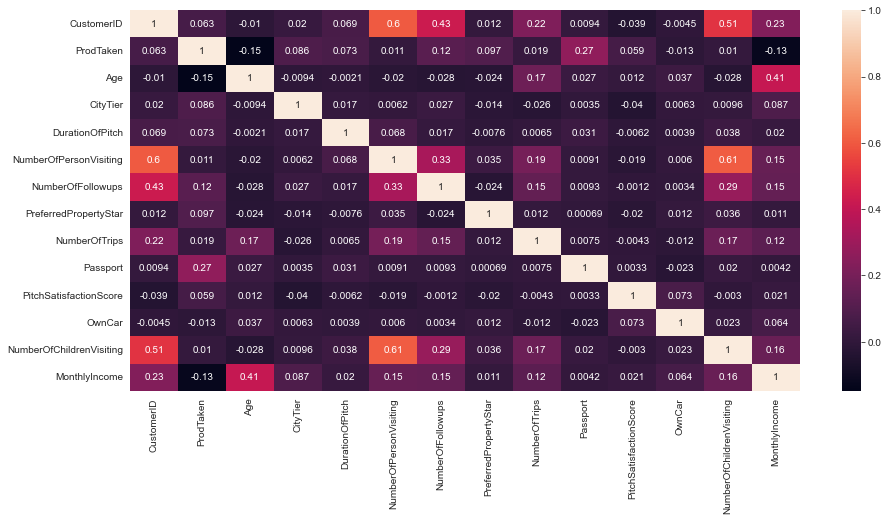

In [24]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

* there is no particular co-relation between the columns.

# Dropping unnecessary columns

In [25]:
df.drop('CustomerID',axis=1,inplace=True)

# Splitting dataset in x and y 

In [26]:
x = df.drop('ProdTaken',axis=1)
y = df['ProdTaken']

# Spilting categorical columns

In [27]:
x.head()
x = pd.get_dummies(x,drop_first=True)

# Train Test Split 

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size = 0.2, random_state=100)

# Model Training (Decision Tree)

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

# Feature importance Graph

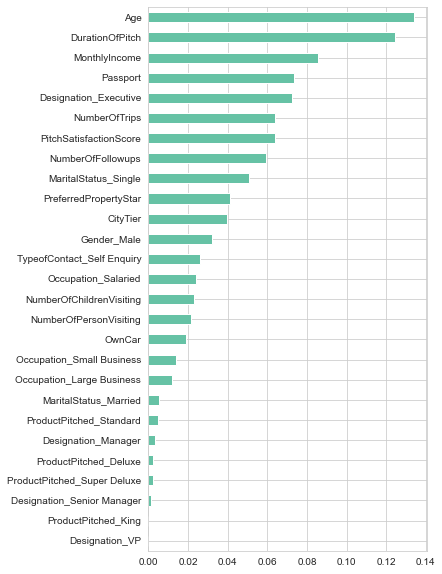

In [30]:
fi = dt.feature_importances_
imp = pd.Series(fi,index=x.columns).sort_values()
plt.figure(figsize=(5,10))
imp.plot.barh()
plt.show()

# Prediction 

In [31]:
y_pred= dt.predict(x_test)

# Accuracy 

### Train Accuracy 

In [32]:
print('training accuracy is ' + str(dt.score(x_train,y_train)*100))

training accuracy is 100.0


### Test Accuracy

In [33]:
print('test accuracy is '+ str(dt.score(x_test,y_test)*100))

test accuracy is 90.84967320261438


In [34]:
acc = accuracy_score(y_test,y_pred)
acc

0.9084967320261438

# Performance Matrix

### Confusion Matrix

In [35]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[695,  51],
       [ 33, 139]], dtype=int64)

### Classification Report

In [36]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       746
           1       0.73      0.81      0.77       172

    accuracy                           0.91       918
   macro avg       0.84      0.87      0.86       918
weighted avg       0.91      0.91      0.91       918



# Hyper parameter turing (Decision Tree)

In [37]:
param_dis = {'criterion':['gini','entropy','log_loss'],
           'splitter':['best','random'],
            'max_depth':[1,5,10,15,20,25,30,None]}

In [38]:
warnings.filterwarnings(action = 'ignore')
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(dt,param_grid = param_dis,cv=5,n_jobs=-1)
grid_search = grid.fit(x_train,y_train)

In [39]:
grid_search.best_score_

0.8991175082059841

In [40]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': None, 'splitter': 'random'}

In [41]:
hdt = DecisionTreeClassifier(max_depth = None,splitter = 'random')
hdt.fit(x_train,y_train)

DecisionTreeClassifier(splitter='random')

# prediction

In [42]:
y_pred_h = hdt.predict(x_test)

# Test Accuracy

In [43]:
acc = accuracy_score(y_test,y_pred_h)
acc

0.9302832244008714

# ----------------------------------------------------------------------

# Random Forest

# Model Building 

In [44]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

# Prediction

In [45]:
y_pred = rf.predict(x_test)

# Accuracy

### Test Accuracy 

In [46]:
print('Test Accuracy is: ' + str(rf.score(x_train,y_train)*100))

Test Accuracy is: 100.0


### Training Accuracy 

In [47]:
print('Training Accuracy is: ' + str(rf.score(x_test,y_test)*100))

Training Accuracy is: 92.81045751633987


# confusion Matrix

In [48]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[736,  10],
       [ 56, 116]], dtype=int64)

# Classification Report

In [49]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       746
           1       0.92      0.67      0.78       172

    accuracy                           0.93       918
   macro avg       0.92      0.83      0.87       918
weighted avg       0.93      0.93      0.92       918



# Hypertuning (Random Forest)

In [50]:
param_dis = {'max_features':[None,'sqrt',0.2],
           'min_samples_leaf':[40,45,50,55,60,65,70],
            'n_estimators':[1,5,10,15,20,None]}

In [51]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(rf,param_grid = param_dis,cv=5,n_jobs=-1)
grid_search = grid.fit(x_train,y_train)

In [52]:
grid_search.best_score_

0.840239246722253

In [53]:
grid_search.best_params_

{'max_features': None, 'min_samples_leaf': 45, 'n_estimators': 5}

In [54]:
hrf = RandomForestClassifier(min_samples_leaf = 40,n_estimators = 20)
hrf.fit(x_train,y_train)

RandomForestClassifier(min_samples_leaf=40, n_estimators=20)

# Prediction

In [55]:
y_pred_h = hrf.predict(x_test)

# Test Accuracy 

In [57]:
acc = accuracy_score(y_test,y_pred_h)
acc

0.8322440087145969

# ------------------------------------------

# Final model building

# Removing unnecessay columns

In [58]:
remove = ['Designation','NumberOfPersonVisiting','NumberOfFollowups','PitchSatisfactionScore','NumberOfChildrenVisiting','TypeofContact','OwnCar','MaritalStatus','Occupation','Gender','ProductPitched']
for i in remove:
    df.drop(i,axis=1,inplace=True)

# X and Y split

In [59]:
xf = df.drop('ProdTaken',axis=1)
yf = df['ProdTaken']

# train and test

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=100)

# Model Training

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

# Prediction

In [62]:
y_pred = dt.predict(x_test)

# Accuracy

### Train Accuracy

In [63]:
print('taining accuracy is ' + str(dt.score(x_train,y_train)*100))

taining accuracy is 100.0


### Train Accuracy

In [64]:
print('taining accuracy is ' + str(dt.score(x_test,y_test)*100))

taining accuracy is 91.39433551198258


### Accuracy

In [65]:
acc = accuracy_score(y_test,y_pred)
acc

0.9139433551198257

# Performance Matrix

### confusion Matrix

In [66]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[696,  50],
       [ 29, 143]], dtype=int64)

### Classification report 

In [67]:
cr = classification_report(y_test,y_pred)

In [68]:
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       746
           1       0.74      0.83      0.78       172

    accuracy                           0.91       918
   macro avg       0.85      0.88      0.86       918
weighted avg       0.92      0.91      0.92       918



# Hyper-parameter Tuning

In [69]:
param_dis = {'criterion':['gini','entropy','log_loss'],
           'splitter':['best','random'],
            'max_depth':[1,5,10,15,20,None]}

In [70]:
warnings.filterwarnings(action = 'ignore')

In [71]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(dt,param_grid = param_dis,cv=5,n_jobs=-1)
grid_search = grid.fit(x_train,y_train)

In [72]:
grid_search.best_score_

0.8939433703454507

In [73]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': None, 'splitter': 'random'}

In [74]:
hdt = DecisionTreeClassifier(criterion = 'entropy'  ,max_depth=20)
hdt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20)

# Prediction (HP Tuning)

In [75]:
y_pred_h = hdt.predict(x_test)

# Accuracy

### Test Accuracy

In [76]:
acc = accuracy_score(y_test,y_pred_h)
acc

0.9084967320261438

# Model Saving

In [77]:
import pickle 

In [78]:
file = 'best_tour_model.pkl'
pickle.dump(dt,open(file,'wb'))